Directory: /kaggle/input/intel-image-classification/seg_train/seg_train
Directory: /kaggle/input/intel-image-classification/seg_train/seg_train/mountain
File: 14986.jpg
File: 3138.jpg
File: 1700.jpg
File: 16257.jpg
File: 2863.jpg
File: 771.jpg
File: 12167.jpg
File: 17643.jpg
File: 6560.jpg
File: 10162.jpg
File: 4009.jpg
File: 15823.jpg
File: 820.jpg
File: 6272.jpg
File: 15783.jpg
File: 3446.jpg
File: 11034.jpg
File: 6295.jpg
File: 5018.jpg
File: 5627.jpg
File: 11956.jpg
File: 5886.jpg
File: 13200.jpg
File: 7061.jpg
File: 12588.jpg
File: 537.jpg
File: 19857.jpg
File: 369.jpg
File: 13673.jpg
File: 14597.jpg
File: 9493.jpg
File: 19888.jpg
File: 6367.jpg
File: 9083.jpg
File: 5392.jpg
File: 19251.jpg
File: 10075.jpg
File: 17091.jpg
File: 15872.jpg
File: 9868.jpg
File: 10611.jpg
File: 1380.jpg
File: 11690.jpg
File: 11524.jpg
File: 13737.jpg
File: 5371.jpg
File: 58.jpg
File: 13928.jpg
File: 14105.jpg
File: 1340.jpg
File: 6000.jpg
File: 6709.jpg
File: 8445.jpg
File: 15689.jpg
File: 11265.jpg
F

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 314s 887ms/step - accuracy: 0.4629 - loss: 1.4681 - val_accuracy: 0.7292 - val_loss: 0.7182
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7188 - loss: 0.6450 - val_accuracy: 0.7000 - val_loss: 0.7720
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


350/350 ━━━━━━━━━━━━━━━━━━━━ 305s 870ms/step - accuracy: 0.7539 - loss: 0.6629 - val_accuracy: 0.7755 - val_loss: 0.6218
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - accuracy: 0.7500 - loss: 0.6232 - val_accuracy: 0.6500 - val_loss: 0.8143
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 302s 860ms/step - accuracy: 0.8190 - loss: 0.4880 - val_accuracy: 0.8071 - val_loss: 0.5493
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.7812 - loss: 0.5069 - val_accuracy: 0.8500 - val_loss: 0.3594
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 300s 857ms/step - accuracy: 0.8805 - loss: 0.3384 - val_accuracy: 0.7999 - val_loss: 0.6203
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8750 - loss: 0.2816 - val_accuracy: 0.8000 - val_loss: 0.7262
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 301s 860ms/step - accuracy: 0.9349 - loss: 0.1933 - val_accuracy: 0.7489 - val_loss: 0.9440
Epoch 10/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.8125 - loss: 0.3680 - val_

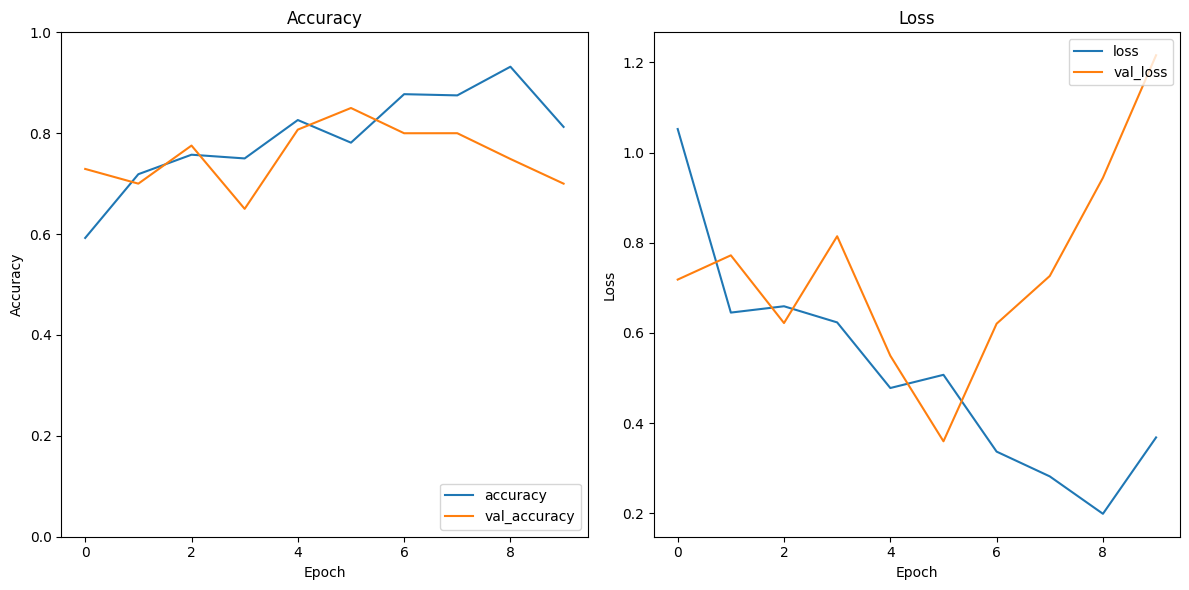

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import os

# Verify directory structure
base_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'
for dirname, _, filenames in os.walk(base_path):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f"File: {filename}")

# Setting up training and validation data with a validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data will be used for validation
)

train_generator = train_datagen.flow_from_directory(
    base_path,  # Path to the training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify that this is the training subset
)

validation_generator = train_datagen.flow_from_directory(
    base_path,  # Path to the training data (same as above)
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation subset
)

# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')  # adjust based on the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plotting accuracy and loss curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.tight_layout()
plt.show()


2024-07-25 15:35:25.494325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 15:35:25.494461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 15:35:25.689294: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Directory: /kaggle/input/intel-image-classification/seg_train/seg_train
Directory: /kaggle/input/intel-image-classification/seg_train/seg_train/mountain
File: 14986.jpg
File: 3138.jpg
File: 1700.jpg
File: 16257.jpg
File: 2863.jpg
File: 771.jpg
File: 12167.jpg
File: 17643.jpg
File: 6560.jpg
File: 10162.jpg
File: 4009.jpg
File: 15823.jpg
File: 820.jpg
File: 6272.jpg
File: 15783.jpg
File: 3446.jpg
File: 11034.jpg
File: 6295.jpg
File: 5018.jpg
File: 5627.jpg
File: 11956.jpg
File: 5886.jpg
File: 13200.jpg
File: 7061.jpg
File: 12588.jpg
File: 537.jpg
File: 19857.jpg
File: 369.jpg
File: 13673.jpg
File: 14597.jpg
File: 9493.jpg
File: 19888.jpg
File: 6367.jpg
File: 9083.jpg
File: 5392.jpg
File: 19251.jpg
File: 10075.jpg
File: 17091.jpg
File: 15872.jpg
File: 9868.jpg
File: 10611.jpg
File: 1380.jpg
File: 11690.jpg
File: 11524.jpg
File: 13737.jpg
File: 5371.jpg
File: 58.jpg
File: 13928.jpg
File: 14105.jpg
File: 1340.jpg
File: 6000.jpg
File: 6709.jpg
File: 8445.jpg
File: 15689.jpg
File: 11265.jpg
F

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 1692s 5s/step - accuracy: 0.7370 - loss: 0.7419 - val_accuracy: 0.8614 - val_loss: 0.3933
Epoch 2/10
  1/350 ━━━━━━━━━━━━━━━━━━━━ 21:54 4s/step - accuracy: 0.6875 - loss: 0.4880

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6875 - loss: 0.4880 - val_accuracy: 0.7000 - val_loss: 0.6170
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1682s 5s/step - accuracy: 0.8625 - loss: 0.3801 - val_accuracy: 0.8567 - val_loss: 0.3785
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.9062 - loss: 0.2630 - val_accuracy: 0.8000 - val_loss: 0.4455
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1681s 5s/step - accuracy: 0.8741 - loss: 0.3413 - val_accuracy: 0.8592 - val_loss: 0.3787
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9375 - loss: 0.2007 - val_accuracy: 0.9500 - val_loss: 0.1990
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1697s 5s/step - accuracy: 0.8837 - loss: 0.3168 - val_accuracy: 0.8534 - val_loss: 0.3821
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7500 - loss: 0.4870 - val_accuracy: 0.7500 - val_loss: 0.6304
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1703s 5s/step - accuracy: 0.8873 - loss: 0.3018 - val_accuracy: 0.

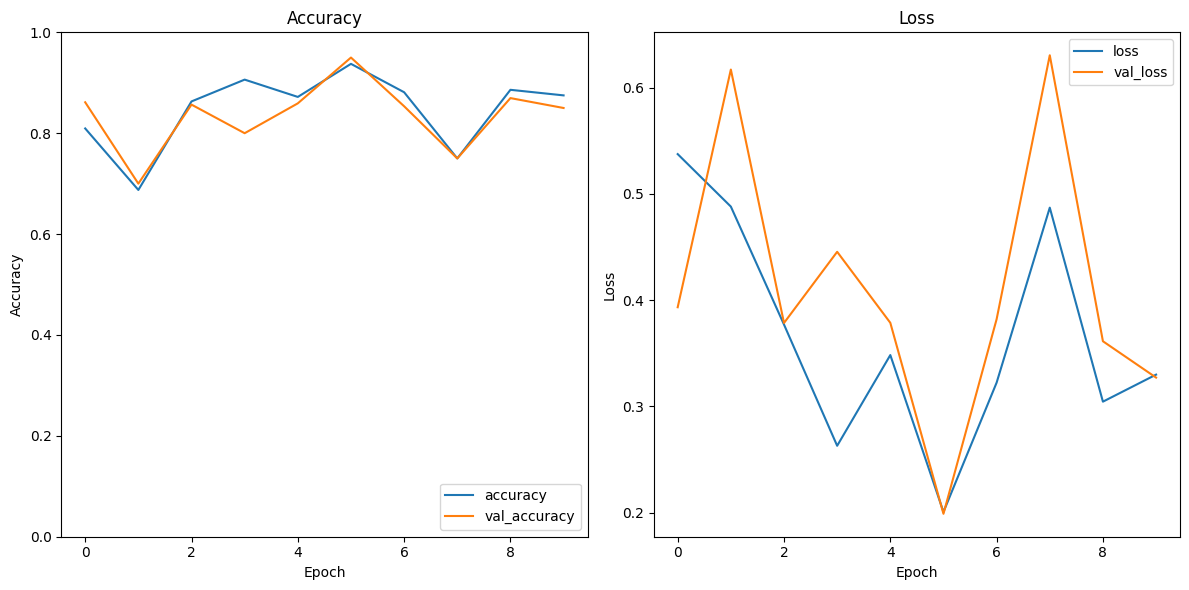

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

# Verify directory structure
base_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'
for dirname, _, filenames in os.walk(base_path):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f"File: {filename}")

# Setting up training and validation data with a validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data will be used for validation
)

train_generator = train_datagen.flow_from_directory(
    base_path,  # Path to the training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify that this is the training subset
)

validation_generator = train_datagen.flow_from_directory(
    base_path,  # Path to the training data (same as above)
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation subset
)

# Load VGG16 without the top layers and freeze the weights
base_model = VGG16(include_top=False, weights='/kaggle/input/sssssss/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers for our task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Adjust based on number of classes

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plotting accuracy and loss curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.tight_layout()
plt.show()
